## Wine Quality Predictor

This project uses a neural network to predict wine quality based on several explanatory variables outlined below.  
Data visualization and ANOVA were used to determine which variables to omit, and which to include. 

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../red-wine-dataset/wineQualityReds.csv')
pd.set_option('display.max_rows', None)

In [3]:
df = df.drop(df.columns[0], 1)

In [4]:
df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


#### Reconfiguring the 'quality' category for more accurate prediction  
_Reviews_ = 0 if 3 <= _quality_ <= 4  
_Reviews_ = 1 if 5 <= _quality_ <= 6  
_Reviews_ = 2 if 7 <= _quality_ <= 8

In [5]:
import seaborn as sns

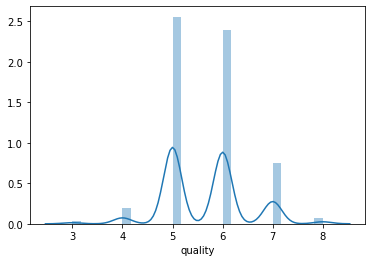

In [6]:
sns.distplot(df['quality'])

In [7]:
reviews = []
for i in df['quality']:
    if i >= 3 and i <= 4:
        reviews.append(1)
    elif i >= 5 and i <= 6:
        reviews.append(2)
    elif i >= 7:
        reviews.append(3)
df['Reviews'] = reviews

#### Visualizing the outcome variable

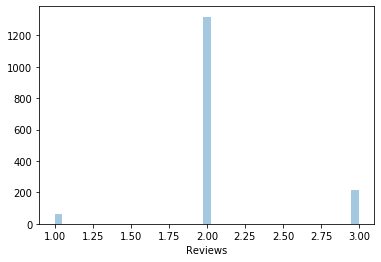

In [8]:
sns.distplot(df['Reviews'], kde=False)

#### Visualizing and running preliminary tests on outcome variables to determine what to include in the model

In [9]:
import scipy.stats as stats

This function splits the given variable's values according to the categories of Reviews into three arrays, then performs a one-way ANOVA on them

In [10]:
def get_split_anova(varname):
    arr1=[]
    arr2=[]
    arr3=[]
    for i in range(len(df[varname])):
        if df['Reviews'][i] == 1:
            arr1.append(df[varname][i])
        elif df['Reviews'][i] == 2:
            arr2.append(df[varname][i])
        elif df['Reviews'][i] == 3:
            arr3.append(df[varname][i])
    return stats.f_oneway(arr1, arr2, arr3)

##### Alcohol

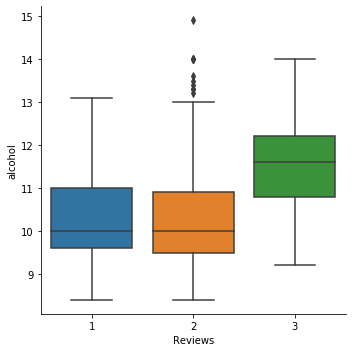

In [11]:
sns.catplot(x="Reviews", y="alcohol", kind="box", data=df)

In [12]:
get_split_anova("alcohol")

F_onewayResult(statistic=158.77759051145458, pvalue=1.2916161190447622e-63)

##### Citric Acid

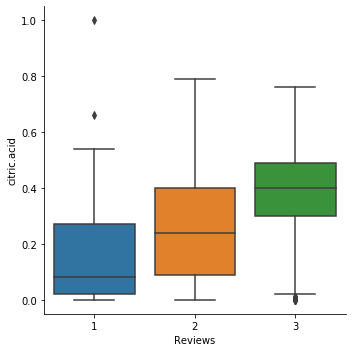

In [13]:
sns.catplot(x="Reviews", y="citric.acid", kind="box", data=df)

In [14]:
get_split_anova("citric.acid")

F_onewayResult(statistic=44.84055093298384, pvalue=1.1309939791709047e-19)

##### Fixed Acidity

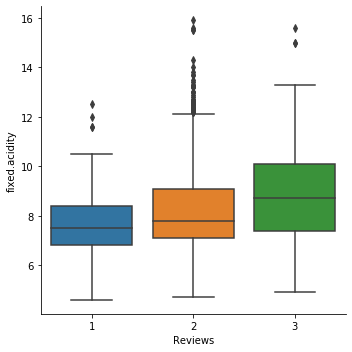

In [15]:
sns.catplot(x="Reviews", y="fixed.acidity", kind="box", data=df)

In [16]:
get_split_anova("fixed.acidity")

F_onewayResult(statistic=13.168538421422843, pvalue=2.1264300676738575e-06)

##### Volatile Acidity

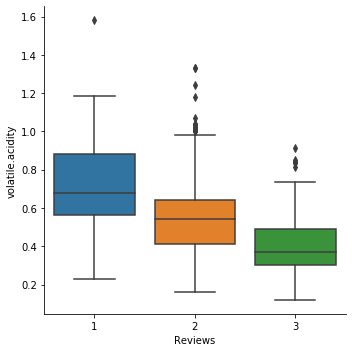

In [17]:
sns.catplot(x="Reviews", y="volatile.acidity", kind="box", data=df)

In [18]:
get_split_anova("volatile.acidity")

F_onewayResult(statistic=102.40396599045721, pvalue=1.436357968294605e-42)

##### Residual Sugar

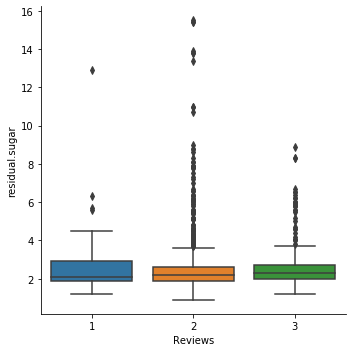

In [19]:
sns.catplot(x="Reviews", y="residual.sugar", kind="box", data=df)

In [20]:
get_split_anova("residual.sugar")

F_onewayResult(statistic=2.3235803242594573, pvalue=0.09825353703123613)

##### Chlorides

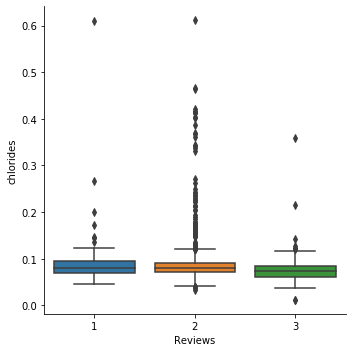

In [21]:
sns.catplot(x="Reviews", y="chlorides", kind="box", data=df)

In [22]:
get_split_anova("chlorides")

F_onewayResult(statistic=8.259666390743718, pvalue=0.0002699663035816813)

##### Free Sulfur Dioxide

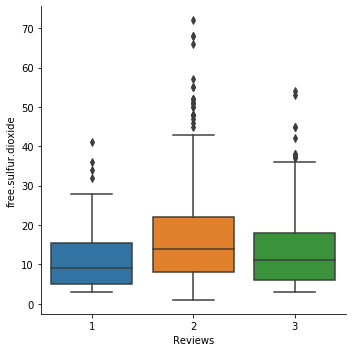

In [23]:
sns.catplot(x="Reviews", y="free.sulfur.dioxide", kind="box", data=df)

In [24]:
get_split_anova("free.sulfur.dioxide")

F_onewayResult(statistic=9.300890592482181, pvalue=9.639020248327718e-05)

##### Total Sulfur Dioxide

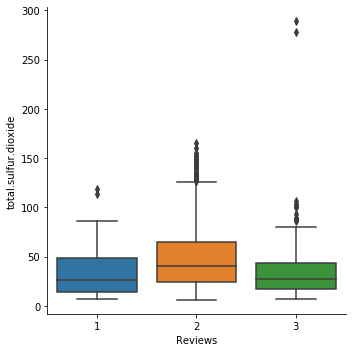

In [25]:
sns.catplot(x="Reviews", y="total.sulfur.dioxide", kind="box", data=df)

In [26]:
get_split_anova("total.sulfur.dioxide")

F_onewayResult(statistic=21.95699739497124, pvalue=3.91767412687428e-10)

##### Density

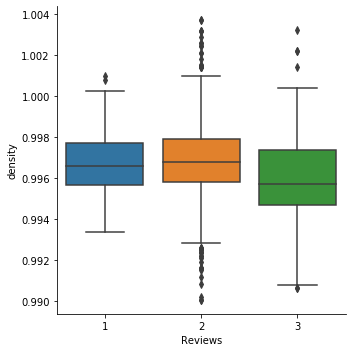

In [27]:
sns.catplot(x="Reviews", y="density", kind="box", data=df)

In [28]:
get_split_anova("density")

F_onewayResult(statistic=18.76516704694085, pvalue=8.805121986213431e-09)

##### pH

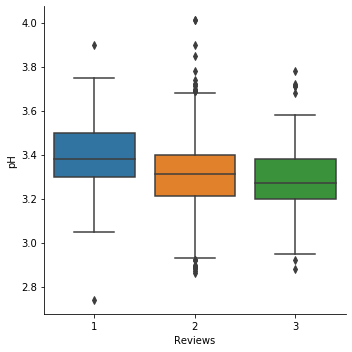

In [29]:
sns.catplot(x="Reviews", y="pH", kind="box", data=df)

In [30]:
get_split_anova("pH")

F_onewayResult(statistic=9.410305769860614, pvalue=8.65097637054731e-05)

##### Sulphates

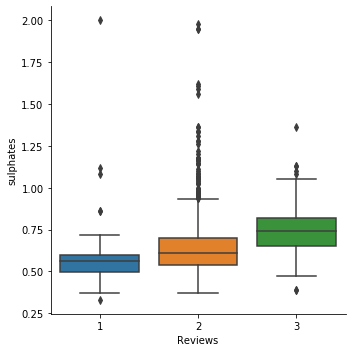

In [31]:
sns.catplot(x="Reviews", y="sulphates", kind="box", data=df)

In [32]:
get_split_anova("sulphates")

F_onewayResult(statistic=36.51997485253014, pvalue=3.103071132575916e-16)

#### Examining correlations between variables to keep only the most relevant variables

In [33]:
corr = df.corr()
corr

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Reviews
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.125886
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.333816
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.228930
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.030153
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.098829
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.025075
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.081960
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.123566
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.093946
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.205409


#### Plotting the variables with the highest correlations between them

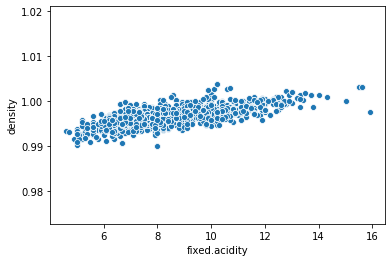

In [34]:
sns.scatterplot(x='fixed.acidity', y='density', data=df)

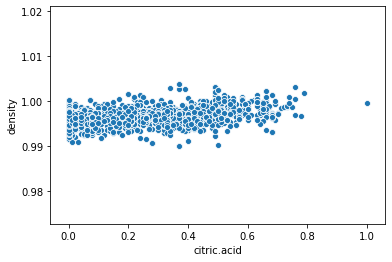

In [35]:
sns.scatterplot(x='citric.acid', y='density', data=df)

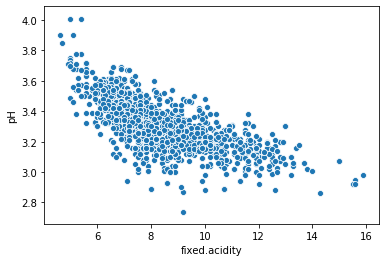

In [36]:
sns.scatterplot(x='fixed.acidity', y='pH', data=df)

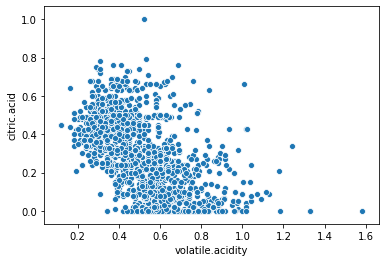

In [37]:
sns.scatterplot(x='volatile.acidity', y='citric.acid', data=df)

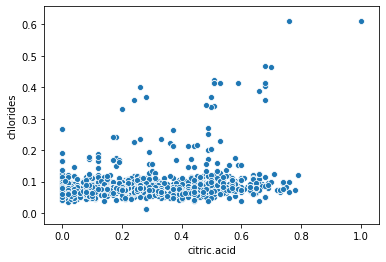

In [38]:
sns.scatterplot(x='citric.acid', y='chlorides', data=df)

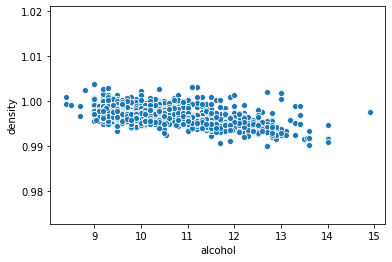

In [39]:
sns.scatterplot(x='alcohol', y='density', data=df)

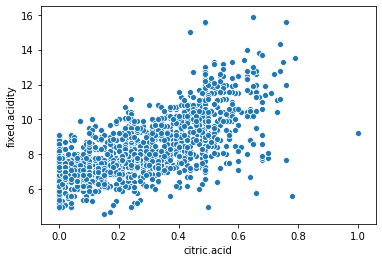

In [40]:
sns.scatterplot(x='citric.acid', y='fixed.acidity', data=df)

#### Creating the neural network

We have found that residual sugar is not significant at the 5% level in our one-way ANOVA (using 'Review' as the explanatory variable), and the similar spread across outcome category is also observed in the boxplot.  
We also exclude fixed acidity from the model due to high correlation with citric acid, density and pH, making it redundant.  
Lastly, we remove chlorides, since the spread across outcome categories is quite similar and therefore seems to have little predictive power.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [42]:
X, y = np.array(df[df.columns.difference(['Reviews', 'quality', 'fixed.acidity', 
                                          'residual.sugar', 'chlorides', 'citric.acid'])]), np.array(df['Reviews'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
nn = MLPClassifier(activation='tanh', solver='adam', verbose=True)
nn.fit(X_train, y_train)

Iteration 1, loss = 0.93803110
Iteration 2, loss = 0.62244778
Iteration 3, loss = 0.57185829
Iteration 4, loss = 0.55440781
Iteration 5, loss = 0.54147872
Iteration 6, loss = 0.53925349
Iteration 7, loss = 0.53051912
Iteration 8, loss = 0.52371328
Iteration 9, loss = 0.51911995
Iteration 10, loss = 0.51438383
Iteration 11, loss = 0.51161768
Iteration 12, loss = 0.50976615
Iteration 13, loss = 0.50756579
Iteration 14, loss = 0.50481056
Iteration 15, loss = 0.50333610
Iteration 16, loss = 0.50150583
Iteration 17, loss = 0.49949817
Iteration 18, loss = 0.49760732
Iteration 19, loss = 0.49514903
Iteration 20, loss = 0.49310591
Iteration 21, loss = 0.49124326
Iteration 22, loss = 0.49058296
Iteration 23, loss = 0.48903620
Iteration 24, loss = 0.48782800
Iteration 25, loss = 0.48539905
Iteration 26, loss = 0.48383238
Iteration 27, loss = 0.48198274
Iteration 28, loss = 0.48130520
Iteration 29, loss = 0.47955753
Iteration 30, loss = 0.47830684
Iteration 31, loss = 0.47678621
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [45]:
accuracy_score(y_test, nn.predict(X_test))

0.83